In [1]:
import matplotlib.pyplot as plt
from math import pi
from math import sin
from math import cos


def my_fft_base(args, inverse):
    size = len(args)
    if size == 1:
        return

    even = args[:size:2]
    odd = args[1:size:2]

    my_fft_base(even, inverse)
    my_fft_base(odd, inverse)
    angle = 2 * pi / size * (-1 if inverse else 1)
    multiplier = complex(1, 0)
    increment = complex(cos(angle), sin(angle))
    for it in range(size // 2):
        args[it] = even[it] + multiplier * odd[it]
        args[it + size // 2] = even[it] - multiplier * odd[it]
        if inverse:
            args[it] /= 2
            args[it + size // 2] /= 2
        multiplier *= increment


def my_fft(args):
    my_fft_base(args, False)


def my_rfft(args):
    my_fft_base(args, True)


def distort_values(args, distortion_percentage):
    assert 1 >= distortion_percentage >= 0
    first_null = round(len(args) * (1 - distortion_percentage))
    for index in range(first_null, len(args)):
        args[index] = 0


def build_graph(func, distortion_percentage):
    x_values = []
    y_values = []

    for it in range(1, 2 ** 14 + 1):
        x_values.append(10 * it / (2 ** 14 + 1))


    for it in x_values:
        y_values.append(func(it))

    plt.plot(x_values, y_values, color="GREEN")

    my_fft(y_values)
    distort_values(y_values, distortion_percentage)
    my_rfft(y_values)
    y_values = [value.real for value in y_values]

    plt.plot(x_values, y_values, color="RED")
    plt.grid()
    plt.show()


In [2]:
# Зеленым цветом выделен график исходной функции
# Красным - график функции, построенной после прямого и обратного преобразования Фурье

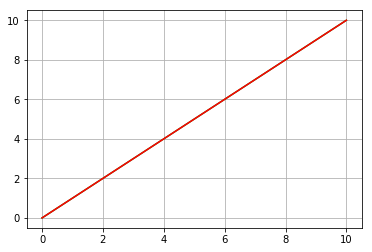

In [3]:
def line(arg):
    return arg


distortion_percentage_ = 0
build_graph(line, distortion_percentage_)

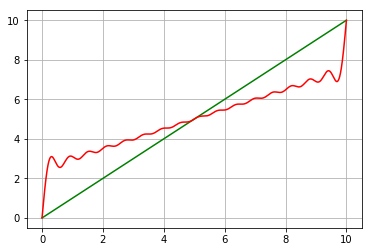

In [4]:
distortion_percentage_ = 0.001
build_graph(line, distortion_percentage_)

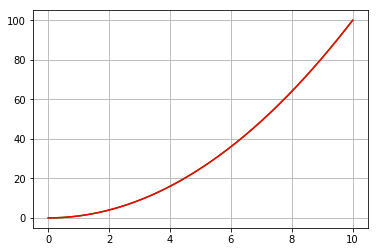

In [5]:
def square(arg):
    return arg * arg

distortion_percentage_ = 0
build_graph(square, distortion_percentage_)


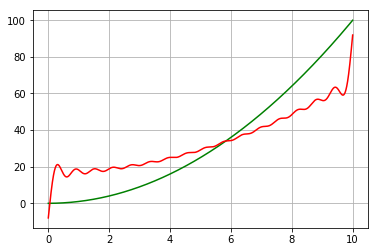

In [6]:
distortion_percentage_ = 0.001
build_graph(square, distortion_percentage_)

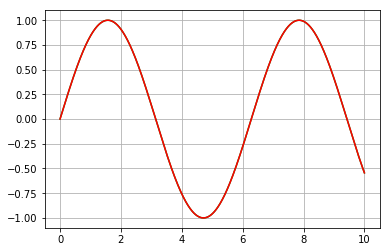

In [7]:
distortion_percentage_ = 0
build_graph(sin, distortion_percentage_)

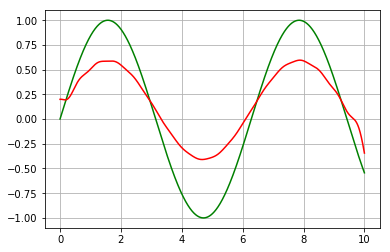

In [8]:
distortion_percentage_ = 0.001
build_graph(sin, distortion_percentage_)

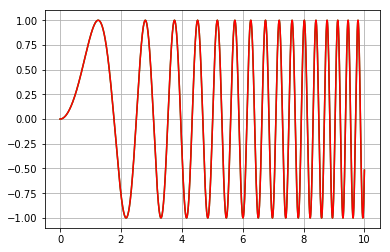

In [9]:
def sin_x_square(arg):
    return sin(arg * arg)


distortion_percentage_ = 0
build_graph(sin_x_square, distortion_percentage_)

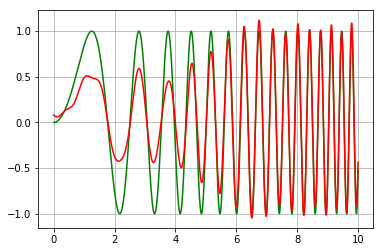

In [10]:
distortion_percentage_ = 0.001
build_graph(sin_x_square, distortion_percentage_)

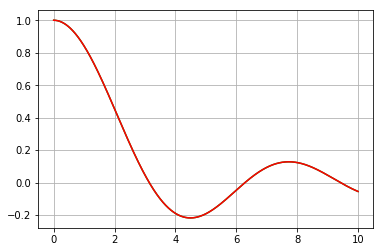

In [11]:
def sin_x_div_x(arg):
    assert arg != 0
    return sin(arg) / line(arg)


distortion_percentage_ = 0
build_graph(sin_x_div_x, distortion_percentage_)

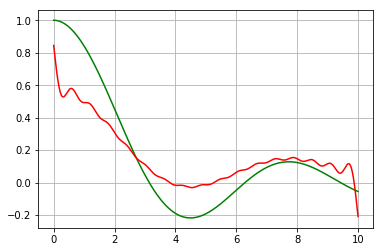

In [12]:
distortion_percentage_ = 0.001
build_graph(sin_x_div_x, distortion_percentage_)

In [13]:
# Зануление даже незначительного числа точек приводит к сильным искажениям в графике